# **Data Visualisation**
Since we used different datasets for different kinds of analyses in our project, data visualisation will be conducted for all 3 datasets. The three datasets are as follows:
> 1. dataset.csv
> 2. time_comparison.csv
> 3. merged.csv

#### **Import Necessary Libraries**

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

---

# **Dataset 1: merged200k.csv**
This dataset was used for the analysis of <u>***continuous numerical*** audio features</u> and <u>track popularity</u>. Audio features were chosen as the predictors as we felt that it could reveal interesting data on people's subconscious preferences for songs sonically.

Track popularity was chosen as the response as it is a variable that reflects how much people like the song.

> **Predictors:** Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo\
> **Response:** Track Popularity

In [4]:
merged200k = pd.read_csv("datasets/merged200k.csv")
merged200k

,Track Name,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,track_id
0,act ii: date @ 8 (feat. Drake) - remix,NaN,0.550,0.545,0.0,-9.304,1.0,0.1630,0.3180,0.000000,0.0608,0.412,102.469,4.0,86,3QS9ZCtoSCJhmaJ7QNXSAS
1,LEAP!,NaN,0.892,0.585,11.0,-7.269,1.0,0.1020,0.1460,0.000004,0.0881,0.244,104.011,4.0,38,3vl2uH4D2QItFFhzz5L06g
2,Overdrive,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.0101,0.000000,0.1410,0.460,104.959,4.0,66,3QyoC6OvQUmpQwQZ18iaTs
3,Raise y_our glass,NaN,0.567,0.503,8.0,-6.119,1.0,0.1240,0.5810,0.000000,0.3690,0.184,72.798,4.0,59,7j1vFohEm1lbsctYY9gyGd
4,In My Mind,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.7890,0.002750,0.3450,0.323,135.936,3.0,72,2W779g2UrRZtVdf3FcEOO1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191391,Quickly (feat. Brandy),Soul,0.736,0.701,A#,-4.345,Minor,0.1000,0.2310,0.000000,0.2030,0.770,99.991,4/4,39,1U0OMWvR89Cm20vCNar50f
191392,P.O.P.,Soul,0.802,0.516,D,-9.014,Major,0.2130,0.1040,0.000485,0.1050,0.482,175.666,4/4,43,2gGqKJWfWbToha2YmDxnnj
191393,I'll Take Care Of You - Single Version,Soul,0.423,0.337,A#,-13.092,Minor,0.0436,0.5660,0.000000,0.2760,0.497,80.023,4/4,32,2iZf3EUedz9MPqbAvXdpdA
191394,Burning Fire,Soul,0.785,0.683,E,-6.944,Minor,0.0337,0.0329,0.000880,0.2370,0.969,113.830,4/4,38,1qWZdkBl4UVPj9lK6HuuFM


### **Cleaning Dataset**
There are a huge number of tracks that have a track popularity of 0, as seen below.

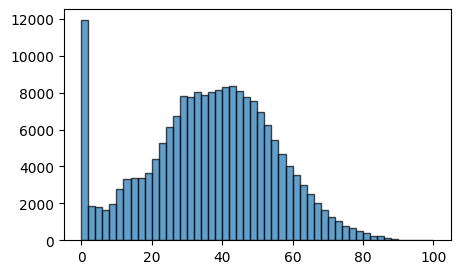

In [11]:
plt.figure(figsize=(5, 3))
plt.hist(merged200k['Track Popularity'], bins=50, alpha=0.7, edgecolor='black')
plt.show()

In [7]:
merged200k.loc[merged200k['Track Popularity']==0].head(10)

,Track Name,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,track_id
32,Take Me To Church,"irish singer-songwriter, modern rock, pov: indie",0.566,0.664,4.0,-5.303,0.0,0.0464,0.634000,0.000000,0.1160,0.437,128.945,4.0,0,7dS5EaCoMnN7DzlpT6aRn2
39,The Heart Wants What It Wants,"pop, post-teen pop",0.616,0.789,7.0,-4.874,0.0,0.0377,0.053000,0.000000,0.1420,0.621,83.066,4.0,0,2jcPoPin36hyNRSi4ZsqeB
41,Bumpy Ride,NaN,0.709,0.854,0.0,-4.447,0.0,0.0399,0.047000,0.000000,0.0724,0.826,105.074,4.0,0,0tBRo4P60DgKmg4jt48upm
42,Danza Kuduro (feat. Don Omar),reggaeton,0.706,0.890,0.0,-6.575,1.0,0.0847,0.085500,0.000000,0.0465,0.896,130.051,4.0,0,1kAZhbcsXqfUjnVeqPywn2
45,Girlfriend,"canadian pop, candy pop, dance pop, pop",0.560,0.959,7.0,-2.433,1.0,0.1020,0.000738,0.000206,0.2090,0.670,163.983,4.0,0,5HbCnVLXRyZVxnreOPgJCK
46,Baby,"canadian pop, pop",0.463,0.854,8.0,-5.386,1.0,0.3200,0.042800,0.000000,0.0922,0.567,65.038,4.0,0,4NFhtFE68cXUrfbne8JE2c
48,Coconut Tree,NaN,0.687,0.855,7.0,-5.341,0.0,0.0416,0.048600,0.000000,0.2330,0.647,130.029,4.0,0,5L9THbmMKB6ZlHlMgzaXHf
49,One Less Lonely Girl,"canadian pop, pop",0.580,0.750,4.0,-4.421,1.0,0.1940,0.159000,0.000000,0.2740,0.728,86.938,4.0,0,7qUcqYzOtfZe65bednDxmz
51,Don't You Worry Child - Radio Edit,"edm, pop dance, progressive electro house",0.608,0.828,2.0,-3.597,1.0,0.0510,0.125000,0.000000,0.1130,0.484,128.919,4.0,0,5DcPOPPUnNhyPYbTi2aWjR
54,Radioactive,"modern rock, pop, rock",0.473,0.777,9.0,-3.698,1.0,0.0590,0.119000,0.000079,0.6710,0.210,136.249,4.0,0,6Ep6BzIOB9tz3P4sWqiiAB


 On further observation, there are definitely some songs that by general knowledge are definitely not unpopular! This is perhaps a limitation where Spotify did not update the song's track popularity, and thus assigned a value of 0 by default. Unfortunately, we will have to remove these tracks.

In [13]:
merged200k.drop(merged200k.loc[merged200k['Track Popularity']==0].index, inplace=True)

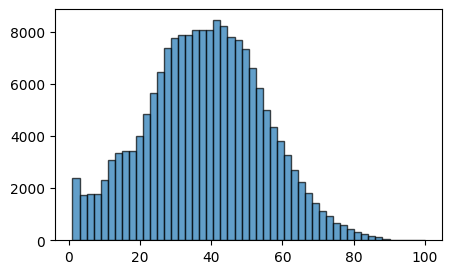

In [14]:
plt.figure(figsize=(5, 3))
plt.hist(merged200k['Track Popularity'], bins=50, alpha=0.7, edgecolor='black')
plt.show()

Much better! This verifies that the tracks with popularity of zero are removed from the dataset.

### **Retrieve Features for Analysis**

In [15]:
songdata1 = pd.DataFrame(merged200k.select_dtypes(include=['int64','float64']))
songdata1

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.550,0.545,-9.304,0.1630,0.3180,0.000000,0.0608,0.412,102.469,86
1,0.892,0.585,-7.269,0.1020,0.1460,0.000004,0.0881,0.244,104.011,38
2,0.568,0.788,-6.280,0.0377,0.0101,0.000000,0.1410,0.460,104.959,66
3,0.567,0.503,-6.119,0.1240,0.5810,0.000000,0.3690,0.184,72.798,59
4,0.668,0.392,-12.178,0.0585,0.7890,0.002750,0.3450,0.323,135.936,72
...,...,...,...,...,...,...,...,...,...,...
191391,0.736,0.701,-4.345,0.1000,0.2310,0.000000,0.2030,0.770,99.991,39
191392,0.802,0.516,-9.014,0.2130,0.1040,0.000485,0.1050,0.482,175.666,43
191393,0.423,0.337,-13.092,0.0436,0.5660,0.000000,0.2760,0.497,80.023,32
191394,0.785,0.683,-6.944,0.0337,0.0329,0.000880,0.2370,0.969,113.830,38


In [83]:
songdata1.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
count,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000
mean,0.543939,0.569832,-9.842602,0.124478,0.386414,0.163715,0.223170,0.454047,117.512706,38.079378
std,0.188678,0.272136,6.268587,0.200278,0.361618,0.316555,0.209152,0.266313,31.155954,16.666866
min,0.000000,0.000020,-52.457000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,1.000000
25%,0.420000,0.370000,-12.337000,0.036600,0.040600,0.000000,0.097400,0.227000,92.446000,27.000000
50%,0.561000,0.610000,-7.909000,0.049100,0.256000,0.000056,0.130000,0.444000,115.527000,38.000000
75%,0.684000,0.797000,-5.505000,0.099500,0.763000,0.063500,0.276000,0.668000,138.942000,50.000000
max,0.989000,1.000000,3.744000,0.967000,0.996000,0.999000,1.000000,1.000000,242.903000,100.000000


### **Distribution of Predictors**

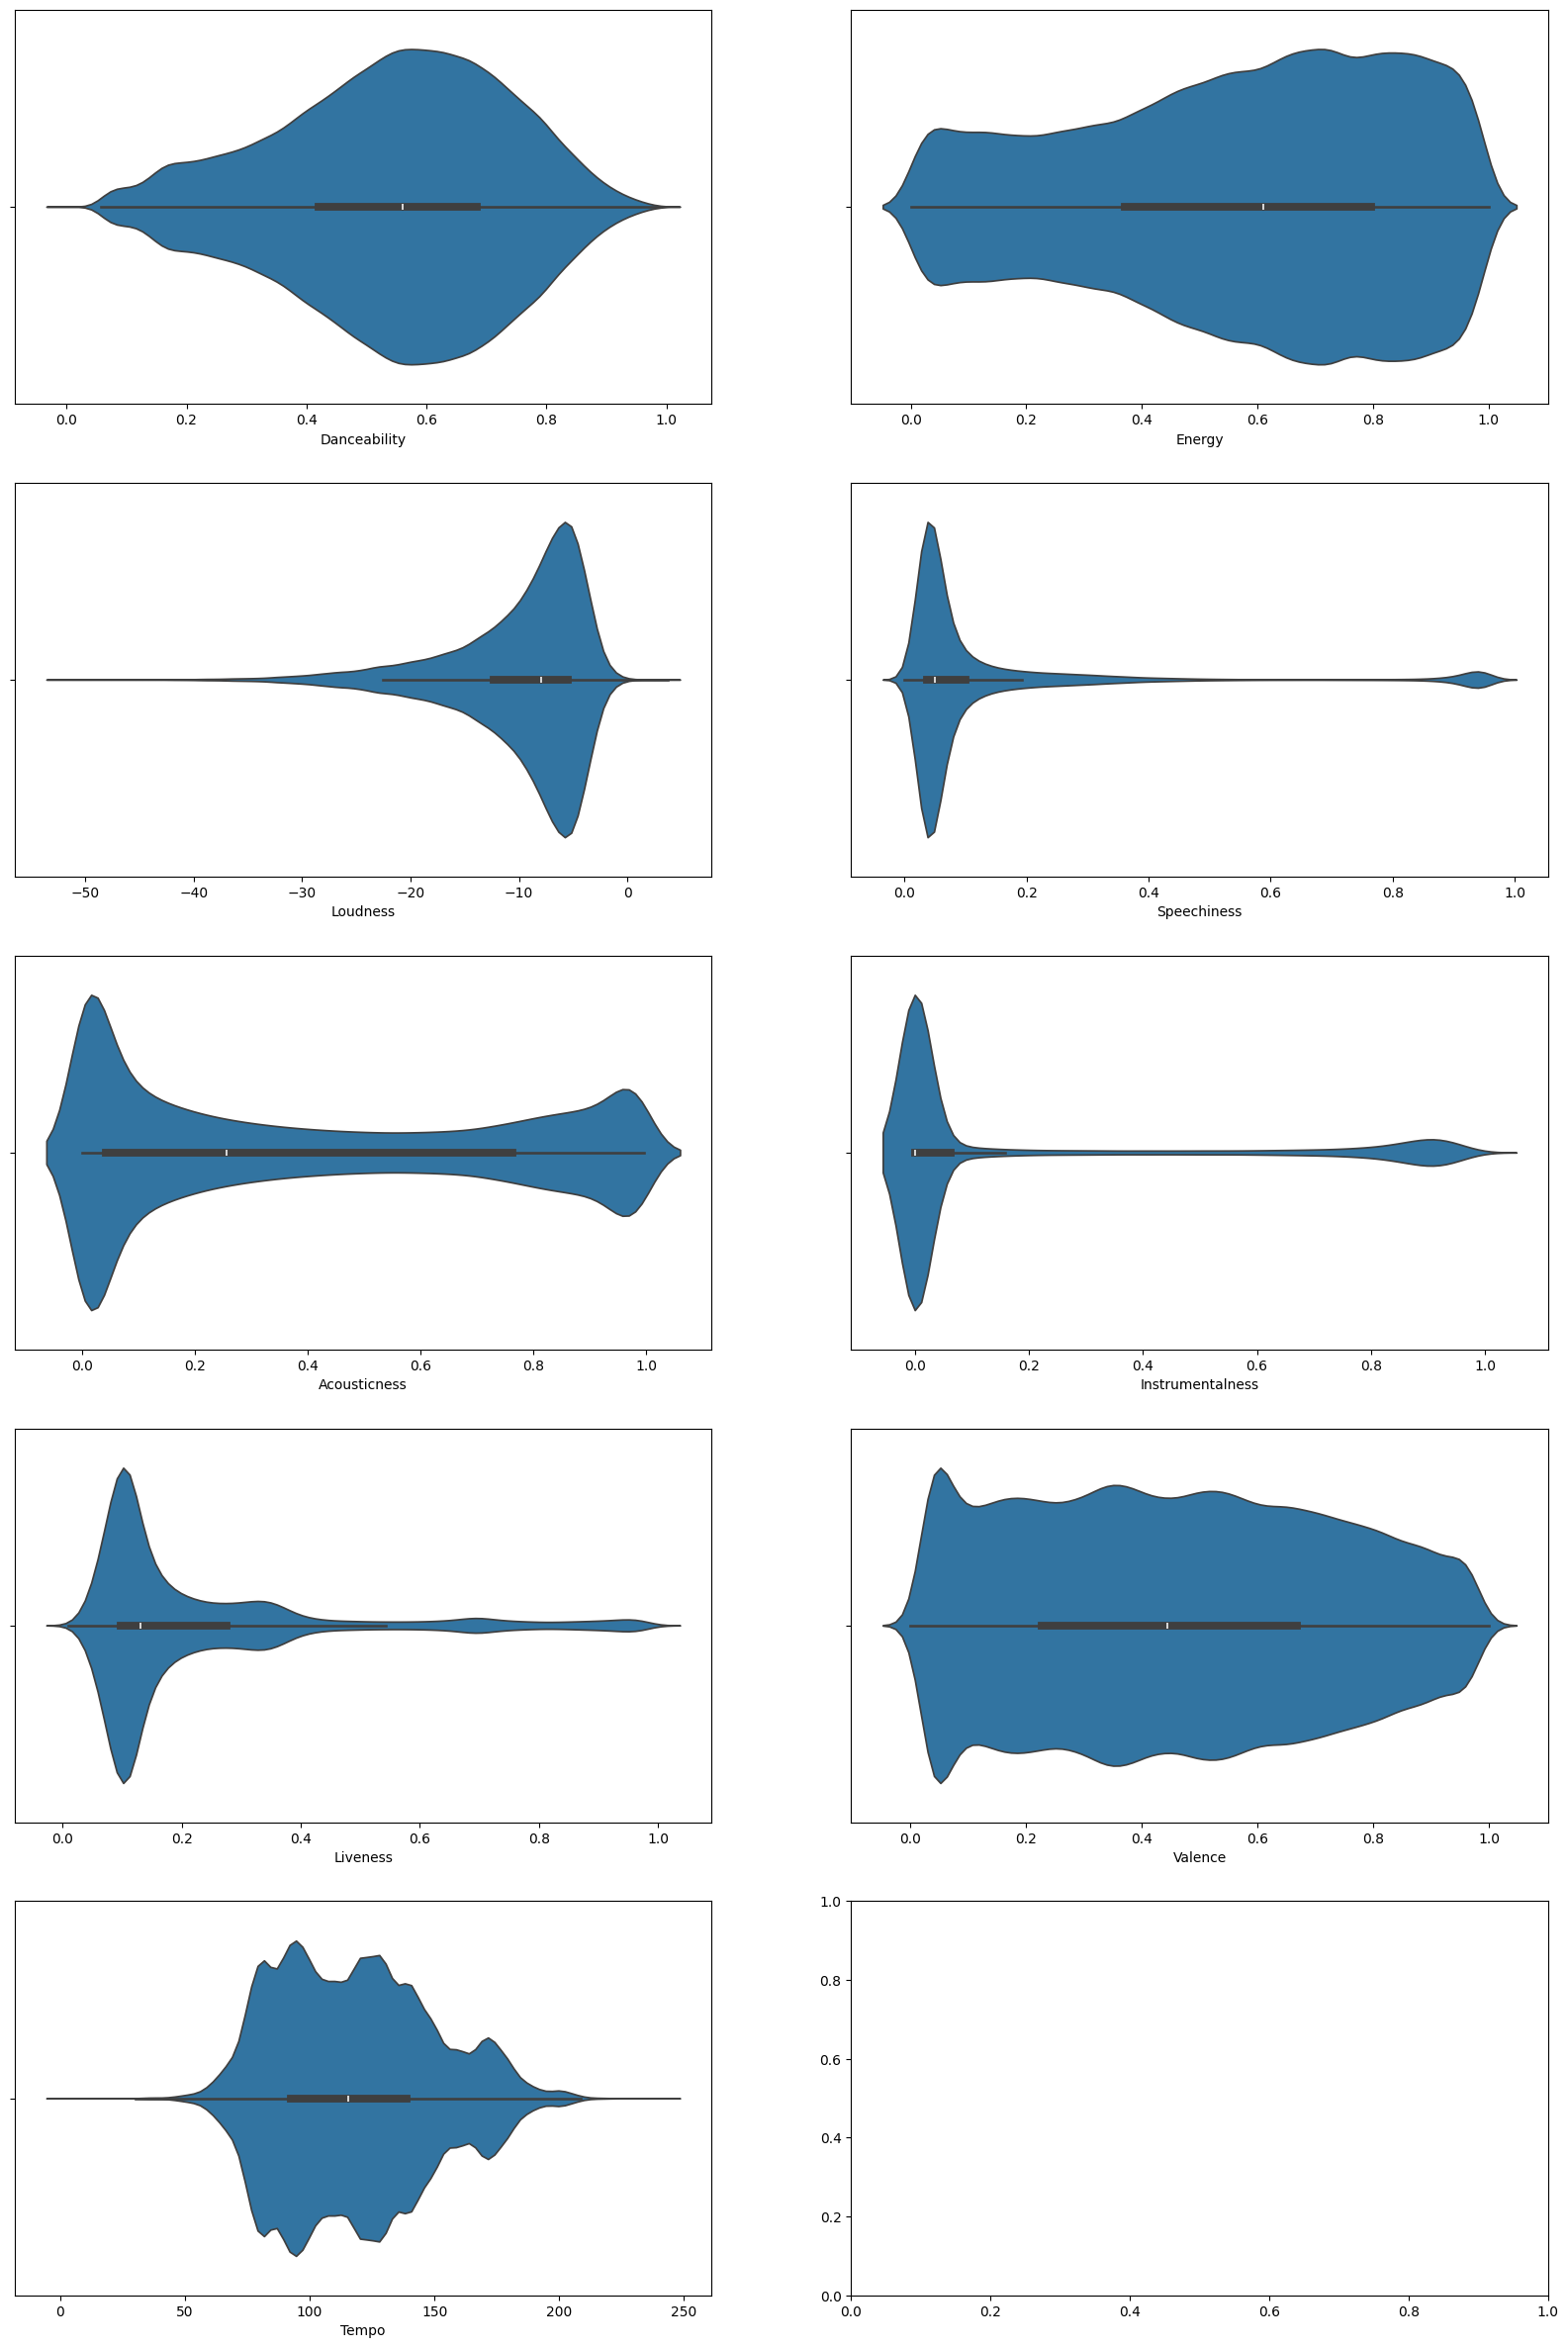

In [19]:
# Plot the distribution of predictors
f, axes = plt.subplots(5,2,figsize=(20,30))
total = 0
row = 0

audio_features = [c for c in songdata1.columns if c != "Track Popularity"]

for var in audio_features:
    if total % 2 == 0:
        col = 0
    else:
        col = 1
    
    vp = sb.violinplot(data=songdata1[var], orient='h', ax=axes[row,col])
    vp.set_xlabel(var, fontsize=10)
    total += 1

    if total % 2 == 0:
        row += 1


As seen from the distribution plots above, a few of the variables are <u>skewed to one end</u> (i.e. Loudness, Instrumentalness, Speechiness, Acousticness, Liveness)

However, some of the variables have quite a <u>centered distribution</u> (i.e. Danceability, Energy, Valence, Tempo)

### **Distribution of Response**
We will now specifically look at the distribution of 'Track Popularity' as it is the key metric in deciding the popularity of a song

In [17]:
songdata1["Track Popularity"].describe()

count    180881.000000
mean         38.079378
std          16.666866
min           1.000000
25%          27.000000
50%          38.000000
75%          50.000000
max         100.000000
Name: Track Popularity, dtype: float64

Text(0.5, 0.98, 'Distribution of Track Popularity for merged200k')

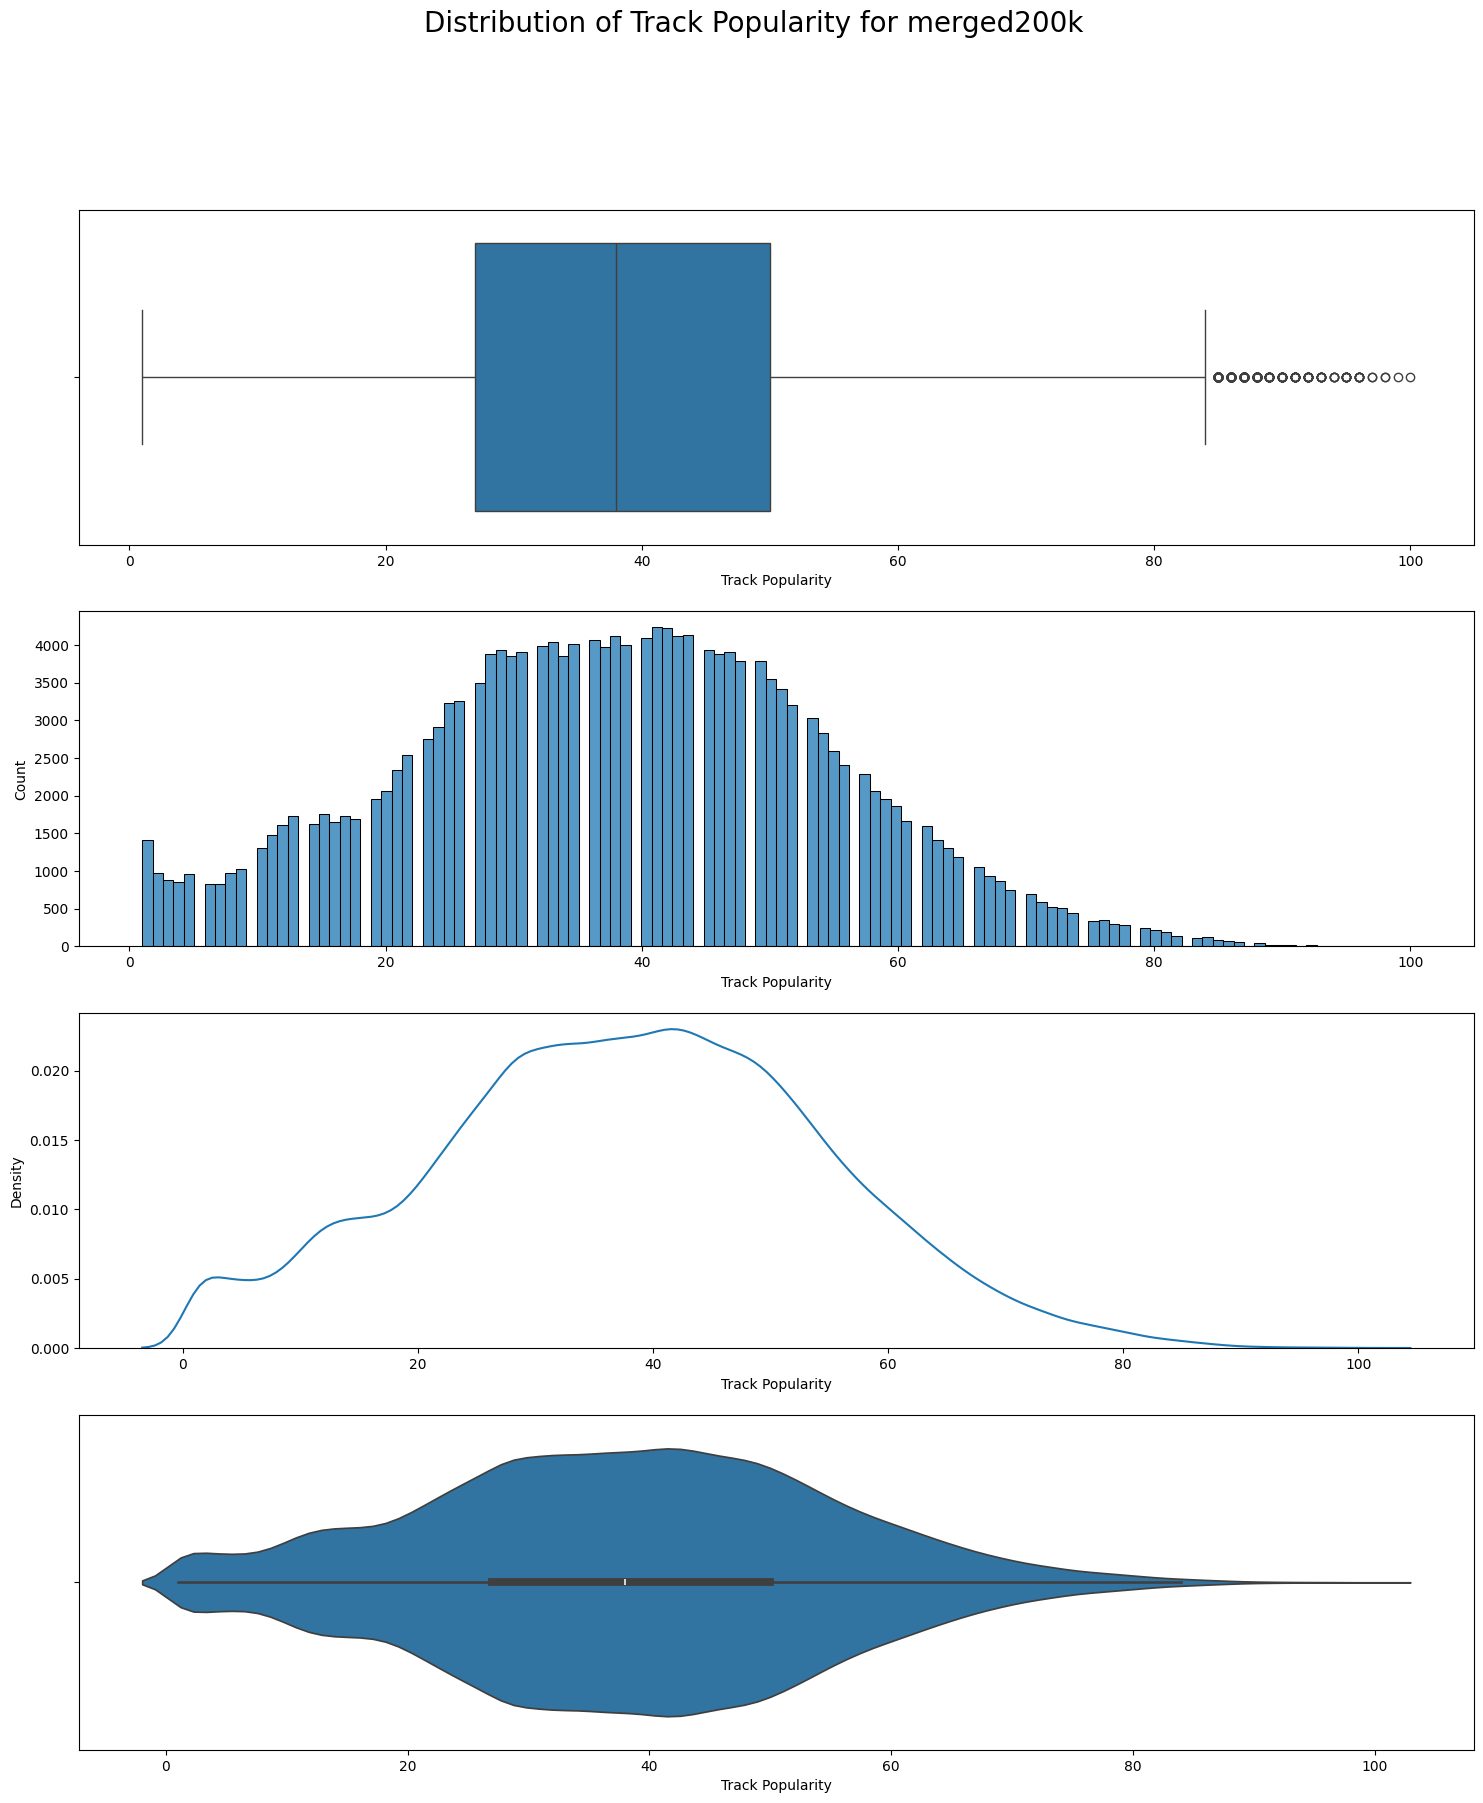

In [18]:
# Plot distribution of Track Popularity
f, axes = plt.subplots(4, figsize=(18,20))
box_tp = sb.boxplot(data=songdata1["Track Popularity"], orient="h", ax=axes[0])
histo_tp = sb.histplot(data=songdata1["Track Popularity"], ax=axes[1])
kde_tp = sb.kdeplot(data=songdata1["Track Popularity"], ax=axes[2])
violin_tp = sb.violinplot(data=songdata1["Track Popularity"], orient="h", ax=axes[3])
f.suptitle("Distribution of Track Popularity for merged200k", fontsize=20)

Even after removing the excessive number of invalid 'track popularity = 0' tracks, the distribution is still skewed to the left as seen in the plots above. There are too few tracks with a high 'track popularity' value.

Thus, we conducted resampling on 'merged200k.csv' in order to balance out the distribution.

The process of data resampling is explained in our <u>***'data-resampling.ipynb'***</u> notebook.

## **After Resampling**

In [ ]:
"""
try to superimpose new plots over old plots
"""

---

# <u>**Dataset 2: merged20k.csv**</u>
This dataset was used for the analysis of <u>artist genre</u>, <u>artist popularity</u>, <u>album release date</u> and <u>track popularity</u>. We were unable to use merged200k.csv for this analysis as merged200k.csv does not contain artist popularity and album release date.

We felt that genre would be an important factor in influencing how popular a song is. However, the Spotify API does not include a field for track genre. Since most artists tend to have their own sound, and release tracks of the same genre(s), we decided that 'artist genre' would also be a suitable variable to observe the correlation between genre and track popularity.

Artist popularity was also chosen as a predictor as we believed it would be an important variable in determining a song's popularity. For example, songs released by a popular artist like Taylor Swift always gain a lot of streams.

Album release date was also chosen in order to allow us to conduct a time comparison.

Track popularity was chosen as the response as it is a variable that reflects how much people like the song.

> **Predictors:** Artist Genre, Artist Popularity, Album Release Date\
> **Response:** Track Popularity

### **Cleaning Dataset**

In [23]:
merged20k = pd.read_csv("datasets/merged20k.csv")
merged20k

,Track Name,Album Release Decade,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Artist Popularity,Track URI,Track Popularity
0,act ii: date @ 8 (feat. Drake) - remix,20s,NaN,0.550,0.545,0.0,-9.304,1.0,0.1630,0.318000,0.000000,0.0608,0.412,102.469,4.0,74,spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS,86
1,LEAP!,20s,NaN,0.892,0.585,11.0,-7.269,1.0,0.1020,0.146000,0.000004,0.0881,0.244,104.011,4.0,50,spotify:track:3vl2uH4D2QItFFhzz5L06g,38
2,Overdrive,20s,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.010100,0.000000,0.1410,0.460,104.959,4.0,81,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,66
3,Raise y_our glass,20s,NaN,0.567,0.503,8.0,-6.119,1.0,0.1240,0.581000,0.000000,0.3690,0.184,72.798,4.0,69,spotify:track:7j1vFohEm1lbsctYY9gyGd,59
4,In My Mind,20s,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.789000,0.002750,0.3450,0.323,135.936,3.0,62,spotify:track:2W779g2UrRZtVdf3FcEOO1,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,Get A Life,00s,"big beat,breakbeat",0.710,0.952,11.0,-6.286,0.0,0.0557,0.023200,0.000121,0.2860,0.889,137.976,4.0,43,spotify:track:4gFL3QgCRx0o1B5KjlkCR1,22
18478,Kernkraft 400,00s,german techno,0.798,0.430,8.0,-7.839,0.0,0.0868,0.005500,0.901000,0.1460,0.487,140.064,4.0,48,spotify:track:6PUzxtIHkv346yP89NzP9X,57
18479,Never Say Never - Radio Edit,00s,"australian dance,melbourne bounce",0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,22,spotify:track:5k9QrzJFDAp5cXVdzAi02f,17
18480,Groovejet (If This Ain't Love) [feat. Sophie E...,00s,"disco house,vocal house,dance pop,europop,new ...",0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,44,spotify:track:5ydeCNaWDmFbu4zl0roPAH,62


As done for 'merged200k.csv', we will need to remove the rows with 'track popularity = 0' to account for the limitation where Spotify did not update the song's track popularity.

In [25]:
merged20k.drop(merged20k.loc[merged20k['Track Popularity']==0].index, inplace=True)
merged20k

,Track Name,Album Release Decade,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Artist Popularity,Track URI,Track Popularity
0,act ii: date @ 8 (feat. Drake) - remix,20s,NaN,0.550,0.545,0.0,-9.304,1.0,0.1630,0.318000,0.000000,0.0608,0.412,102.469,4.0,74,spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS,86
1,LEAP!,20s,NaN,0.892,0.585,11.0,-7.269,1.0,0.1020,0.146000,0.000004,0.0881,0.244,104.011,4.0,50,spotify:track:3vl2uH4D2QItFFhzz5L06g,38
2,Overdrive,20s,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.010100,0.000000,0.1410,0.460,104.959,4.0,81,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,66
3,Raise y_our glass,20s,NaN,0.567,0.503,8.0,-6.119,1.0,0.1240,0.581000,0.000000,0.3690,0.184,72.798,4.0,69,spotify:track:7j1vFohEm1lbsctYY9gyGd,59
4,In My Mind,20s,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.789000,0.002750,0.3450,0.323,135.936,3.0,62,spotify:track:2W779g2UrRZtVdf3FcEOO1,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,Get A Life,00s,"big beat,breakbeat",0.710,0.952,11.0,-6.286,0.0,0.0557,0.023200,0.000121,0.2860,0.889,137.976,4.0,43,spotify:track:4gFL3QgCRx0o1B5KjlkCR1,22
18478,Kernkraft 400,00s,german techno,0.798,0.430,8.0,-7.839,0.0,0.0868,0.005500,0.901000,0.1460,0.487,140.064,4.0,48,spotify:track:6PUzxtIHkv346yP89NzP9X,57
18479,Never Say Never - Radio Edit,00s,"australian dance,melbourne bounce",0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,22,spotify:track:5k9QrzJFDAp5cXVdzAi02f,17
18480,Groovejet (If This Ain't Love) [feat. Sophie E...,00s,"disco house,vocal house,dance pop,europop,new ...",0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,44,spotify:track:5ydeCNaWDmFbu4zl0roPAH,62


The drop in the number of rows indicates that successful removal of tracks with track popularity 0 has occurred. 

However, as observed, there are some rows with empty values in the column of "Artist Genres". We will need to remove these rows as they will not be useful in our analysis.

In [26]:
#Dropping all rows where "Artist Genres" is empty
merged20k = merged20k.dropna(subset=['Artist Genres']) 
merged20k

,Track Name,Album Release Decade,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Artist Popularity,Track URI,Track Popularity
2,Overdrive,20s,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.010100,0.000000,0.1410,0.460,104.959,4.0,81,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,66
4,In My Mind,20s,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.789000,0.002750,0.3450,0.323,135.936,3.0,62,spotify:track:2W779g2UrRZtVdf3FcEOO1,72
6,deja vu,20s,pop,0.442,0.612,2.0,-7.222,1.0,0.1120,0.584000,0.000006,0.3700,0.178,180.917,4.0,90,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,86
7,poster boy,20s,gen z singer-songwriter,0.539,0.709,1.0,-6.687,1.0,0.0321,0.154000,0.066600,0.1610,0.410,163.944,4.0,62,spotify:track:2TaCG1ArsxRsUyZhqy5jei,51
9,Seven (feat. Latto),20s,k-pop,0.802,0.832,11.0,-4.107,1.0,0.0434,0.311000,0.000000,0.0815,0.890,124.997,4.0,86,spotify:track:7x9aauaA9cu6tyfpHnqDLo,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,Get A Life,00s,"big beat,breakbeat",0.710,0.952,11.0,-6.286,0.0,0.0557,0.023200,0.000121,0.2860,0.889,137.976,4.0,43,spotify:track:4gFL3QgCRx0o1B5KjlkCR1,22
18478,Kernkraft 400,00s,german techno,0.798,0.430,8.0,-7.839,0.0,0.0868,0.005500,0.901000,0.1460,0.487,140.064,4.0,48,spotify:track:6PUzxtIHkv346yP89NzP9X,57
18479,Never Say Never - Radio Edit,00s,"australian dance,melbourne bounce",0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,22,spotify:track:5k9QrzJFDAp5cXVdzAi02f,17
18480,Groovejet (If This Ain't Love) [feat. Sophie E...,00s,"disco house,vocal house,dance pop,europop,new ...",0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,44,spotify:track:5ydeCNaWDmFbu4zl0roPAH,62


Now that we have our cleaned dataset, we can move on to the actual data visualisation. We can now retrieve the specific columns we need for this analysis.

In [29]:
songdata2 = pd.DataFrame(merged20k[["Artist Genres", "Artist Popularity", "Album Release Decade", "Track Popularity"]])
songdata2

,Artist Genres,Artist Popularity,Album Release Decade,Track Popularity
2,"bedroom pop, pop, pov: indie",81,20s,66
4,gen z singer-songwriter,62,20s,72
6,pop,90,20s,86
7,gen z singer-songwriter,62,20s,51
9,k-pop,86,20s,84
...,...,...,...,...
18477,"big beat,breakbeat",43,00s,22
18478,german techno,48,00s,57
18479,"australian dance,melbourne bounce",22,00s,17
18480,"disco house,vocal house,dance pop,europop,new ...",44,00s,62


## **Visualisation of each variable**

### **Distribution of Response (Track Popularity)**

In [30]:
songdata2["Track Popularity"].describe()

count    13382.000000
mean        52.345763
std         20.190186
min          1.000000
25%         39.000000
50%         55.000000
75%         68.000000
max        100.000000
Name: Track Popularity, dtype: float64

Text(0.5, 0.98, 'Distribution of Track Popularity for merged20k')

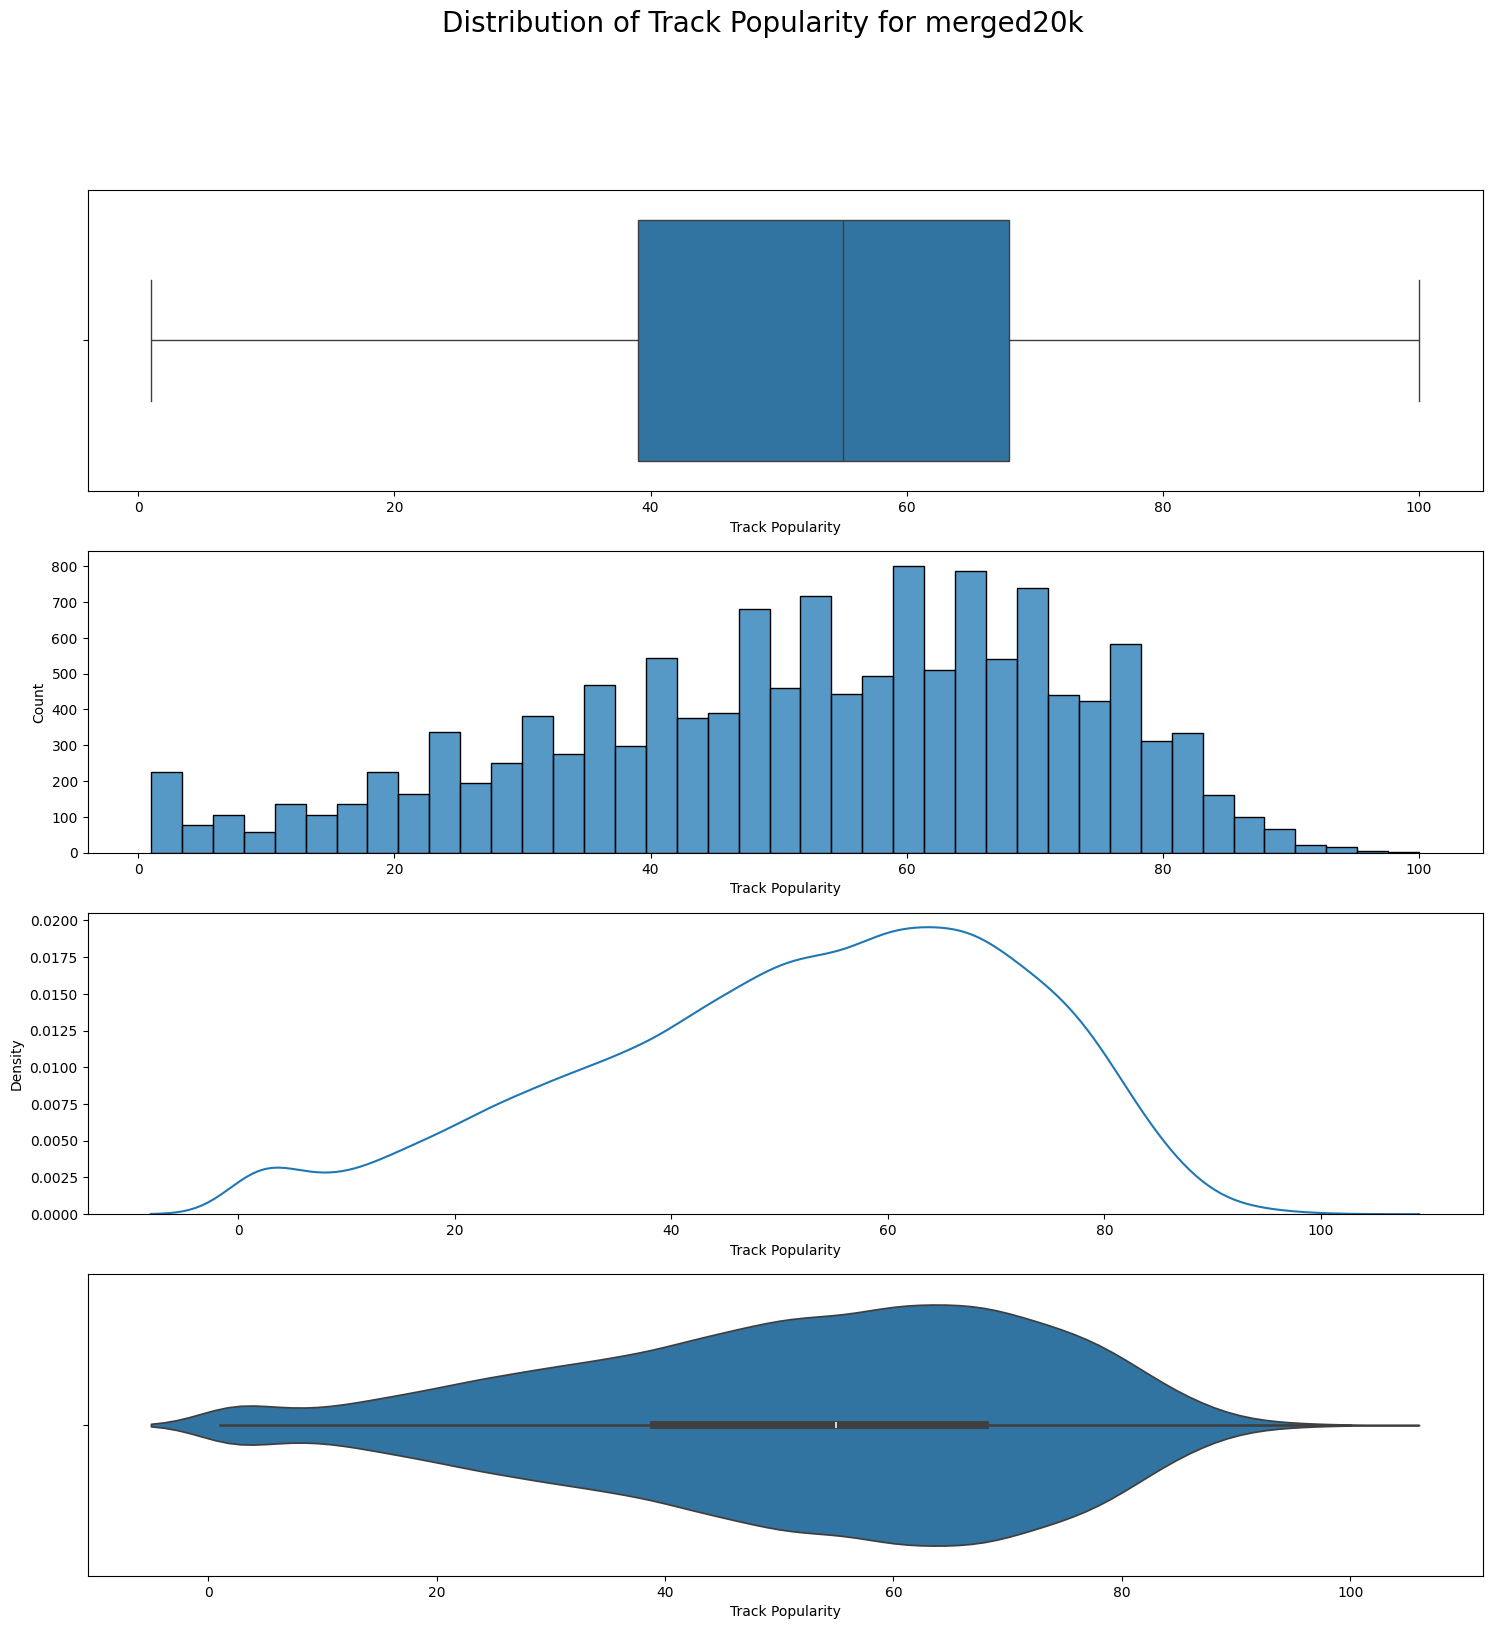

In [31]:
# Plot distribution of Track Popularity
f, axes = plt.subplots(4, figsize=(18,18))
box_tp = sb.boxplot(data=songdata2["Track Popularity"], orient="h", ax=axes[0])
histo_tp = sb.histplot(data=songdata2["Track Popularity"], ax=axes[1])
kde_tp = sb.kdeplot(data=songdata2["Track Popularity"], ax=axes[2])
violin_tp = sb.violinplot(data=songdata2["Track Popularity"], orient="h", ax=axes[3])
f.suptitle("Distribution of Track Popularity for merged20k", fontsize=20)

<u>**Conclusions from distribution plots**</u>\
As seen from the distribution plots above, track popularity's distribution is still slightly skewed. Thus, we normalised the data for the actual analyses to make the dataset more balanced.

### **Distribution of Predictor (Artist Popularity)**

In [32]:
songdata2["Artist Popularity"].describe()

count    13382.000000
mean        62.979599
std         17.379621
min          1.000000
25%         51.000000
50%         65.000000
75%         76.000000
max        100.000000
Name: Artist Popularity, dtype: float64

Text(0.5, 1.0, 'Distribution of Artist Popularity for merged20k')

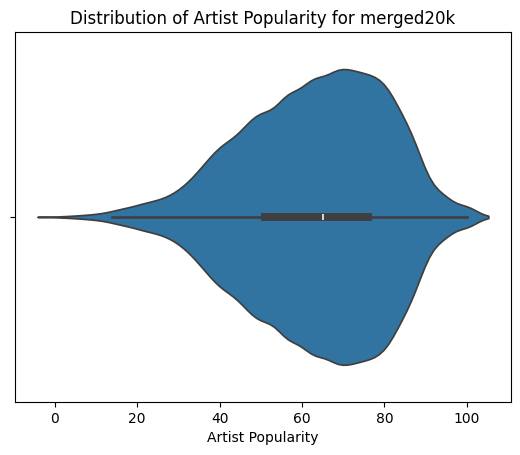

In [33]:
# Plot distribution of Artist Popularity
violin_tp = sb.violinplot(data=songdata2["Artist Popularity"], orient="h")
violin_tp.set_title("Distribution of Artist Popularity for merged20k")

<u>**Conclusion from Violin plot**</u>\
From the plot above, it can be seen that 'Artist Popularity' has a generally centred distribution with few extreme values. 

### **Visualisation of Predictors (Artist Genres and Album Release Date)**

In [45]:
genredate = songdata2[["Artist Genres", "Album Release Decade"]]
genredate

,Artist Genres,Album Release Decade
2,"bedroom pop, pop, pov: indie",20s
4,gen z singer-songwriter,20s
6,pop,20s
7,gen z singer-songwriter,20s
9,k-pop,20s
...,...,...
18477,"big beat,breakbeat",00s
18478,german techno,00s
18479,"australian dance,melbourne bounce",00s
18480,"disco house,vocal house,dance pop,europop,new ...",00s


#### **Artist Genres**
Let us first look at **artist genres:**

In [46]:
genres = pd.DataFrame(genredate["Artist Genres"])
genres["Artist Genres"].value_counts()

Artist Genres
pop                                                                                                             480
dance pop, pop                                                                                                  239
finnish dance pop, finnish hip hop, finnish pop                                                                 222
australian rock                                                                                                 156
dance pop,pop                                                                                                   125
                                                                                                               ... 
canadian pop, canadian rock, pop rock, post-grunge                                                                1
contemporary r&b, dance pop, r&b, urban contemporary                                                              1
new wave pop, pop rock                                    

There are many different artist genres found in the dataset. We will only visualise the top 10 artist genres found in all the songs as they are the most relevant.

In [51]:
top10_genres = genres["Artist Genres"].value_counts().nlargest(10)
genretop10 = genres[genres["Artist Genres"].isin(top10_genres.index)]
genretop10 = 
genretop10.value_counts()

Artist Genres                                  
pop                                                480
dance pop, pop                                     239
finnish dance pop, finnish hip hop, finnish pop    222
australian rock                                    156
dance pop,pop                                      125
k-pop, k-pop boy group                             100
finnish dance pop, finnish hip hop                  80
australian pop,australian talent show               77
finnish dance pop, finnish pop                      73
japanese vtuber                                     72
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Artist Genres'>

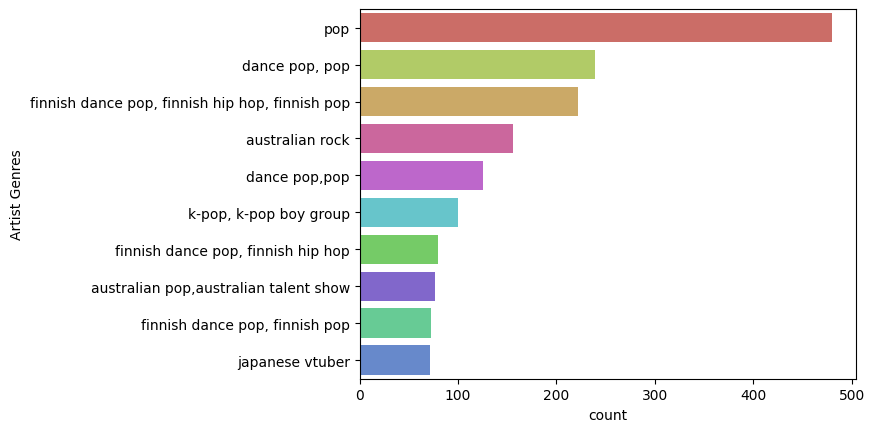

In [67]:
sb.countplot(y=genretop10["Artist Genres"], hue=genretop10["Artist Genres"],
             palette="hls", orient='v', order=genretop10['Artist Genres'].value_counts().index, legend=False)

## **Visualisation of Correlation between variables**

### **Correlation between Track Popularity & Artist Popularity**

In [76]:
trackartist = pd.concat([songdata2["Track Popularity"],songdata2["Artist Popularity"]], axis=1)
trackartist

,Track Popularity,Artist Popularity
0,86,74
1,38,50
2,66,81
3,59,69
4,72,62
...,...,...
18478,22,43
18479,57,48
18480,17,22
18481,62,44


In [77]:
trackartist.corr()

,Track Popularity,Artist Popularity
Track Popularity,1.000000,0.560899
Artist Popularity,0.560899,1.000000


<Axes: >

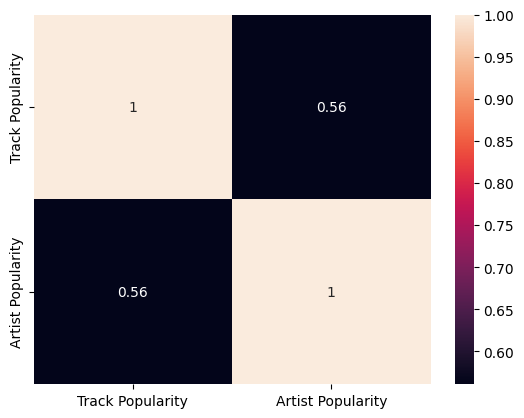

In [78]:
sb.heatmap(trackartist.corr(), annot=True)

<u>**Conclusion from Heatmap**</u>\
As seen from the above heatmap, artist popularity and track popularity have a low correlation of 0.3. However, it is still possible that they may have a non-linear relationship. It is thus important to explore non-linear models as well.

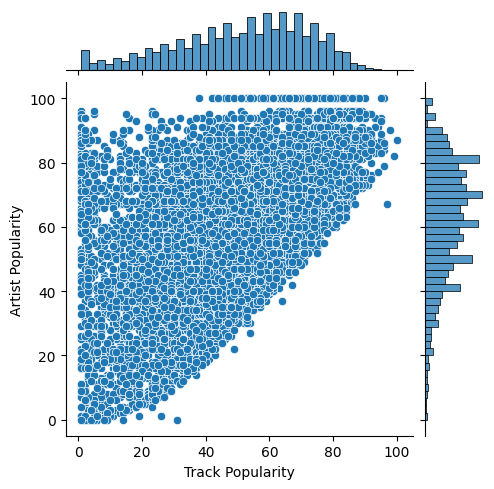

In [79]:
sb.jointplot(data=trackartist, x="Track Popularity", y="Artist Popularity", height=5)